In [1]:
from tqdm import tqdm
import math
import numpy as np
import tensorflow as tf
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import nltk
#nltk.download()
from nltk.corpus import brown
brown.categories()
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
from collections import Counter
import time

E:\deep\Anaconda3\envs\dog-project\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
news = fetch_20newsgroups(subset='all')
print(len(news.data))
print(news.data[0])
print(news.target[0])
ids = list(set(news.target))
print(ids)

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]
[799.0, 973.0, 985.0, 982.0, 963.0, 988.0, 975.0, 990.0, 996.0, 994.0, 999.0, 991.0, 984.0, 990.0, 987.0, 997.0, 910.0, 940.0, 775.0, 628.0]
20


TypeError: text() missing 1 required positional argument: 's'

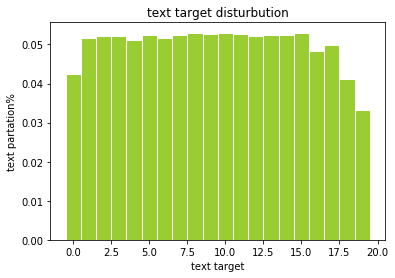

In [3]:
dict = {0.:0., 1.:0., 2.:0., 3.:0., 4.:0., 5.:0., 6.:0., 7.:0., 8.:0., 9.:0., 10.:0., 11.:0., 12.:0., 13.:0., 14.:0., 15.:0., 16.:0., 17.:0., 18.:0., 19.:0.}
for i, _ in enumerate(news.target):
    if news.target[i]==0:
        dict[0.] = dict[0.] + 1.
    if news.target[i]==1:
        dict[1.] = dict[1.] + 1.
    if news.target[i]==2:
        dict[2.] = dict[2.] + 1.
    if news.target[i]==3:
        dict[3.] = dict[3.] + 1.
    if news.target[i]==4:
        dict[4.] = dict[4.] + 1.
    if news.target[i]==5:
        dict[5.] = dict[5.] + 1.
    if news.target[i]==6:
        dict[6.] = dict[6.] + 1.
    if news.target[i]==7:
        dict[7.] = dict[7.] + 1.
    if news.target[i]==8:
        dict[8.] = dict[8.] + 1.
    if news.target[i]==9:
        dict[9.] = dict[9.] + 1.
    if news.target[i]==10:
        dict[10.] = dict[10.] + 1.
    if news.target[i]==11:
        dict[11.] = dict[11.] + 1.
    if news.target[i]==12:
        dict[12.] = dict[12.] + 1.
    if news.target[i]==13:
        dict[13.] = dict[13.] + 1.
    if news.target[i]==14:
        dict[14.] = dict[14.] + 1.
    if news.target[i]==15:
        dict[15.] = dict[15.] + 1.
    if news.target[i]==16:
        dict[16.] = dict[16.] + 1.
    if news.target[i]==17:
        dict[17.] = dict[17.] + 1.
    if news.target[i]==18:
        dict[18.] = dict[18.] + 1.
    if news.target[i]==19:
        dict[19.] = dict[19.] + 1.

x = list(dict.keys())
print(x)
y = list(dict.values())
print(y)
for i, _ in enumerate(y):
    y[i] = y[i] / 18846.
print(len(y))

plt.xlabel('text target')
plt.ylabel('text partation%')
plt.title("text target disturbution")

plt.bar(left=x, height=y, width=1.0, facecolor = 'yellowgreen', edgecolor = 'white')

for xx,yy in zip(x,y):
    plt.text(xx, yy, ha='center', va= 'bottom')

plt.ylim(0,0.07)
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33)
count_v1= CountVectorizer(stop_words = 'english', max_df = 0.5)
counts_train = count_v1.fit_transform(X_train)
print ("the shape of train is "+repr(counts_train.shape))

the shape of train is (14134, 150409)


In [5]:
count_v2 = CountVectorizer(vocabulary=count_v1.vocabulary_)
counts_test = count_v2.fit_transform(X_test)
print ("the shape of test is "+repr(counts_test.shape))

the shape of test is (4712, 150409)


In [6]:
tfidftransformer = TfidfTransformer()
tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)
tfidf_test = tfidftransformer.fit(counts_test).transform(counts_test)

In [7]:
mnb = MultinomialNB(alpha = 0.01)
mnb.fit(tfidf_train, y_train)
m_pred = mnb.predict(tfidf_test)
m_precision = metrics.precision_score(y_test, m_pred, average='micro')
print ('precision:{0:.3f}'.format(m_precision))

precision:0.916


In [8]:
svc = SVC(kernel = 'linear')
svc.fit(tfidf_train, y_train)
s_pred = svc.predict(tfidf_test)
s_precision = metrics.precision_score(y_test, s_pred, average='micro')
print ('precision:{0:.3f}'.format(s_precision))

precision:0.919


In [4]:
wordnet_lemmatizer = WordNetLemmatizer()
emoticons_str = r"""
(?:
[:=;] 
[oO\-]? 
[D\)\]\(\]/\\OpP] 
)"""
regex_str = [
emoticons_str,
r'<[^>]+>', 
r'(?:@[\w_]+)', 
r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
r"(?:[a-z][a-z'\-_]+[a-z])", 
r'(?:[\w_]+)', 
r'(?:\S)' 
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [5]:
def tokenize(s):
    return tokens_re.findall(s)

In [6]:
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [7]:
sample = []
a = [',', '"', '(', ')', '--', '>', '<', '|', '+', '-', '*', '/', '[', ']', '{', '}', '^', ':', '\'', '=', '_', '#', '~', '@', '$', '%', '\\', '__', '___________________________________', '&']
for i, t in enumerate(news.data):
    mm = str(t)
    l = mm.split("\n")
    a1=-1
    b1=-1
    for j, s in enumerate(l):
        ss = s.split(" ")
        if ss[0]=="begin":
            a1 = j
        if ss[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del l[a1:b1+1]
    k=0
    while k<len(l):    
        if len(l[k])==0:
            del l[k]
        else:
            k += 1
    texts = []
    for s in l:
        text = preprocess(s, True)
        text = [word for word in text if word not in a]
        my_words = nltk.pos_tag(text)
        sub_text = []
        for word in my_words:
            if word[1]=='VB':
                ii = wordnet_lemmatizer.lemmatize(word[0], pos='v')
                sub_text.append(ii)
            else:
                ii = wordnet_lemmatizer.lemmatize(word[0])
                sub_text.append(ii)
        texts.append(sub_text)
    sample.append(texts)

In [8]:
for t in sample:
    c1 = []
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="cut":
            c1.append(j)
    if len(c1)==2:
        del t[c1[0]:c1[1]+1]

In [9]:
for t in sample:   
    a1=-1
    b1=-1
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="begin":
            a1 = j
        if len(s)!=0 and s[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del t[a1:b1+1]

In [10]:
X_sample = []
for t in sample:
    m=0
    n=0
    f=False
    l=0
    r=0
    my_texts=[]
    for s in t:
        subb=[]
        eee=[]
        for j, tt in enumerate(s):
            if tt=="." and f==False:
                m=j
                f=True
                continue
            if tt=="." and f:
                n=j
                f=False
            
            if m==0:
                continue
            if j-m==2 and n==0:
                m=0
                f=False
            y=n-m    
            if m!=0 and n!=0 and y==2:
                l=m-1
            if m!=0 and n!=0 and y==-2:
                r=m+1
                m=0
                n=0
                f=False
                
            if l!=0 and r!=0:
                for p in range(l, r+1):
                    eee.append(p)
                l=0
                r=0
                
        for j, tt in enumerate(s):
            if j in eee:
                continue
            subb.append(tt)
        my_texts.append(subb)
        m=0
        n=0
        l=0
        r=0
        f=False
    X_sample.append(my_texts)

In [11]:
d = [".", "!", "?", ";"]
X = []
for t in X_sample:
    XX = []
    for i, tt in enumerate(t):
        k = 0
        flag = True
        for j, w in enumerate(tt):
            if w in d:
                b = tt[k:j]
                flag = False
                XX.append(b)
                k = j+1     
        if flag:
            XX.append(tt)
    X.append(XX)

In [12]:
for t in X:
    j = 0
    while j<len(t):    
        if len(t[j])==0:
            del t[j]
        else:
            j += 1

In [13]:
for t in X:   
    a1=-1
    b1=-1
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="part":
            a1 = j
        if len(s)!=0 and s[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del t[a1:b1+1]

In [14]:
for t in X:
    j = 0
    while j<len(t):    
        if len(t[j])<=1:
            del t[j]
        else:
            j += 1

In [15]:
for t in X:
    j = 0
    while j<len(t):    
        if t[j][0]=='\x08':
            del t[j]
        else:
            j += 1

In [16]:
max_len = 0
max_list = 0
tmp1=0
tmp2=0
for i, t in enumerate(X):
    if max_list<len(t):
        max_list = len(t)
        tmp1 = i
    for j, s in enumerate(t):
        if max_len<len(s):
            max_len = len(s)
            tmp2 = i
print (max_len)
print (max_list)
print (tmp1)
print (tmp2)

77
1690
2694
18535


In [19]:
del X[2694]
Y = []
for i in news.target:
    Y.append(i)
del Y[2694]

In [2]:
output = open("./sample_X", 'wb')
pickle.dump(X, output)
db = open("./sample_X", 'rb')
X = pickle.load(db)
output1 = open("./sample_Y", 'wb')
pickle.dump(Y, output1)
db1 = open("./sample_Y", 'rb')
Y = pickle.load(db1)

In [3]:
with open('./text8') as f:
    text = f.read()

In [4]:
def preprocess(text):
    # Replace punctuation with tokens so we can use them in our model
    text = text.lower()
    text = text.replace('.', ' <PERIOD> ')
    text = text.replace(',', ' <COMMA> ')
    text = text.replace('"', ' <QUOTATION_MARK> ')
    text = text.replace(';', ' <SEMICOLON> ')
    text = text.replace('!', ' <EXCLAMATION_MARK> ')
    text = text.replace('?', ' <QUESTION_MARK> ')
    text = text.replace('(', ' <LEFT_PAREN> ')
    text = text.replace(')', ' <RIGHT_PAREN> ')
    text = text.replace('--', ' <HYPHENS> ')
    text = text.replace('?', ' <QUESTION_MARK> ')
    text = text.replace(':', ' <COLON> ')
    words = text.split()
    return words

In [5]:
def preprocess2(words):
    word_counts = Counter(words)
    trimmed_words = [word for word in words if word_counts[word] > 5]
    return trimmed_words

In [6]:
words = preprocess(text)
print(words[:100])
print("Total words: {}".format(len(words)))
print("Unique words: {}".format(len(set(words))))

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing']
Total words: 17005207
Unique words: 253854


In [7]:
flag = True
for t in X:
    for s in t:
        for w in s:
            if len(w)>17:
                flag = False
                break
        if flag:
            for w in s:
                words.append(w)
        else:
            flag = True
        
print("Total words: {}".format(len(words)))
print("Unique words: {}".format(len(set(words))))

Total words: 21239100
Unique words: 318985


In [8]:
wordsed = preprocess2(words)
print("Total words: {}".format(len(wordsed)))
print("Unique words: {}".format(len(set(wordsed))))

Total words: 20821879
Unique words: 77038


In [9]:
def create_lookup_tables(words):
    """
    Create lookup tables for vocabulary
    :param words: Input list of words
    :return: A tuple of dicts.  The first dict....
    """
    word_counts = Counter(words)
    sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
    int_to_vocab = {ii: word for ii, word in enumerate(sorted_vocab)}
    em_sen = {word: ii for ii, word in int_to_vocab.items()}

    return em_sen, int_to_vocab

In [10]:
em_sen, int_to_vocab = create_lookup_tables(wordsed)
int_words = [em_sen[word] for word in wordsed]

In [11]:
output3 = open("./em_sen", 'wb')
pickle.dump(em_sen, output3)
db3 = open("./em_sen", 'rb')
em_sen = pickle.load(db3)

In [12]:
import random
threshold = 1e-5
word_counts = Counter(int_words)
total_count = len(int_words)
freqs = {word: count/total_count for word, count in word_counts.items()}
p_drop = {word: 1 - np.sqrt(threshold/freqs[word]) for word in word_counts}
train_words = [word for word in int_words if random.random() < (1 - p_drop[word])]

In [13]:
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = set(words[start:idx] + words[idx+1:stop+1])
    
    return list(target_words)

In [14]:
def get_window_batches(words, batch_size, window_size=5):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y

In [15]:
train_graph = tf.Graph()
with train_graph.as_default():
    inputs = tf.placeholder(tf.int32, [None], name='inputs')
    labels = tf.placeholder(tf.int32, [None, None], name='labels')

In [16]:
n_vocab = len(int_to_vocab)
n_embedding = 200 # Number of embedding features 
with train_graph.as_default():
    embedding = tf.Variable(tf.random_uniform((n_vocab, n_embedding), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs)

In [17]:
n_sampled = 100
with train_graph.as_default():
    softmax_w = tf.Variable(tf.truncated_normal((n_vocab, n_embedding), stddev=0.1))
    softmax_b = tf.Variable(tf.zeros(n_vocab))
    # Calculate the loss using negative sampling
    loss = tf.nn.sampled_softmax_loss(softmax_w, softmax_b, 
                                      labels, embed,
                                      n_sampled, n_vocab)
    cost = tf.reduce_mean(loss)
    optimizer = tf.train.AdamOptimizer().minimize(cost)

In [18]:
epochs = 20
batch_size = 1000
window_size = 10

In [19]:
with tf.Session(graph=train_graph) as sess:
    iteration = 1
    loss = 0
    sess.run(tf.global_variables_initializer())

    for e in range(1, epochs+1):
        batches = get_window_batches(train_words, batch_size, window_size)
        start = time.time()
        for x, y in batches:
            
            feed = {inputs: x,
                    labels: np.array(y)[:, None]}
            train_loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            loss += train_loss
            
            if iteration % 100 == 0: 
                end = time.time()
                print("Epoch {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Avg. Training loss: {:.4f}".format(loss/100),
                      "{:.4f} sec/batch".format((end-start)/100))
                loss = 0
                start = time.time()
            
            iteration += 1
    
    em_mx = sess.run(embedding)
    output4 = open("./em_mx", 'wb')
    pickle.dump(em_mx, output4)
    db4 = open("./em_mx", 'rb')
    em_mx = pickle.load(db4)

Epoch 1/20 Iteration: 100 Avg. Training loss: 5.7862 0.1867 sec/batch
Epoch 1/20 Iteration: 200 Avg. Training loss: 5.6707 0.1875 sec/batch
Epoch 1/20 Iteration: 300 Avg. Training loss: 5.6033 0.1863 sec/batch
Epoch 1/20 Iteration: 400 Avg. Training loss: 5.6774 0.1854 sec/batch
Epoch 1/20 Iteration: 500 Avg. Training loss: 5.6144 0.1876 sec/batch
Epoch 1/20 Iteration: 600 Avg. Training loss: 5.6509 0.1876 sec/batch
Epoch 1/20 Iteration: 700 Avg. Training loss: 5.6354 0.1937 sec/batch
Epoch 1/20 Iteration: 800 Avg. Training loss: 5.6502 0.1930 sec/batch
Epoch 1/20 Iteration: 900 Avg. Training loss: 5.5750 0.1911 sec/batch
Epoch 1/20 Iteration: 1000 Avg. Training loss: 5.5116 0.1873 sec/batch
Epoch 1/20 Iteration: 1100 Avg. Training loss: 5.5469 0.1888 sec/batch
Epoch 1/20 Iteration: 1200 Avg. Training loss: 5.4523 0.1881 sec/batch
Epoch 1/20 Iteration: 1300 Avg. Training loss: 5.3803 0.2088 sec/batch
Epoch 1/20 Iteration: 1400 Avg. Training loss: 5.2863 0.1897 sec/batch
Epoch 1/20 Iter

In [3]:
max_len = 200
d = {}
index = 0

In [4]:
def div_xy(X_, Y_, le, id):
    global index, d
    h=0
    for s in X_:
        h+=len(s)
    t = int(h/le)
    if t>0:
        if h%le==0:
            m = ""
            ff=np.zeros((t, le), dtype=np.int32)
            y=[]
            for ii in range(t):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                else:
                    if tmp<le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                    elif tmp==le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
            return ff, y
        else:
            m = ""
            ff=np.zeros((t+1, le), dtype=np.int32)
            y=[]
            for ii in range(t+1):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                else:
                    if tmp<le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                    elif tmp==le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
            return ff, y
    else:
        m = ""
        ff=np.zeros((1, le), dtype=np.int32)
        y=[]
        y.append(Y_)
        tmp=0
        e=0
        for j, s in enumerate(X_):
            tmp+=len(s)
            for w in s:
                try:
                    m += str(em_sen[w]) + " "
                except KeyError:
                    m += "0" + " "
        tmp2=le-tmp
        if tmp2!=0:
            for i in range(tmp2):
                m += "0" + " "
        m = m.strip()
        g = m.split(" ")
        sub=[]
        for gg in g:
            sub.append(int(gg))
        ff[e] = sub
        d[index] = id
        index += 1
        return ff, y

In [5]:
def div_xy2(X_, Y_, le):
    h=0
    for s in X_:
        h+=len(s)
    t = int(h/le)
    if t>0:
        if h%le==0:
            m = ""
            ff=np.zeros((t, le), dtype=np.int32)
            y=[]
            for ii in range(t):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                else:
                    if tmp<le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                    elif tmp==le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
            return ff, y
        else:
            m = ""
            ff=np.zeros((t+1, le), dtype=np.int32)
            y=[]
            for ii in range(t+1):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                else:
                    if tmp<le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                    elif tmp==le:
                        for w in s:
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            try:
                                m += str(em_sen[w]) + " "
                            except KeyError:
                                m += "0" + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        #d[index] = id
                        #index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                try:
                                    m += str(em_sen[w]) + " "
                                except KeyError:
                                    m += "0" + " "
            return ff, y
    else:
        m = ""
        ff=np.zeros((1, le), dtype=np.int32)
        y=[]
        y.append(Y_)
        tmp=0
        e=0
        for j, s in enumerate(X_):
            tmp+=len(s)
            for w in s:
                try:
                    m += str(em_sen[w]) + " "
                except KeyError:
                    m += "0" + " "
        tmp2=le-tmp
        if tmp2!=0:
            for i in range(tmp2):
                m += "0" + " "
        m = m.strip()
        g = m.split(" ")
        sub=[]
        for gg in g:
            sub.append(int(gg))
        ff[e] = sub
        #d[index] = id
        #index += 1
        return ff, y

In [6]:
def div_z(Z, le, feat):
    ff=np.zeros((len(Z), le, feat), dtype=np.float32)
    for j, s in enumerate(Z):
        sub = np.zeros((le, feat), dtype=np.float32)
        if len(s)<le:
            for i in range(0, len(s)-1):
                ssub = []
                for o in range(0, feat):
                    ssub.append(1.0)
                sub[i] = ssub
            l = le - len(s) + 1
            for ii in range(0, l):
                ssub = []
                for oo in range(0, feat):
                    ssub.append(0.0)
                sub[ii] = ssub
        else:
            for i in range(0, le):
                ssub = []
                for o in range(0, feat):
                    ssub.append(1.0)
                sub[i] = ssub
        ff[j] = sub
    return ff

In [8]:
train_data, valid_data, train_target, valid_target = train_test_split(X, Y, random_state=1234)

In [9]:
from mask_text_cnn import cnn_Model
epochs=50
cnn_train_loss_batch = []
cnn_valid_loss_batch = []
cnn_train_acc_batch = []
cnn_valid_acc_batch = []
cnn_train_batches = []
cnn_valid_batches = []
log_batch_step=2048
batch_size=64
cnn_max_vacc=0.0
f_va = 0.0
f_len = 0

In [10]:
with tf.Session() as sess:
    rann = cnn_Model(20, 200, em_mx, 50, max_len)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(rann.loss)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            batch_seq = train_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}    
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {}
            input_z1 = div_z(input_x_list, max_len-1, 50)
            input_z2 = div_z(input_x_list, max_len-2, 50)
            input_z3 = div_z(input_x_list, max_len-3, 50)
            _, l, a = sess.run([optimizer, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.z_in1 : input_z1,
                                  rann.z_in2 : input_z2,
                                  rann.z_in3 : input_z3,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = cnn_train_batches[-1] if cnn_train_batches else 0
                cnn_train_batches.append(log_batch_step + previous_batch)
                cnn_train_loss_batch.append(l)
                cnn_train_acc_batch.append(a)
                    
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}     
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {}
            input_z1 = div_z(input_x_list, max_len-1, 50)
            input_z2 = div_z(input_x_list, max_len-2, 50)
            input_z3 = div_z(input_x_list, max_len-3, 50)
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.z_in1 : input_z1,
                                  rann.z_in2 : input_z2,
                                  rann.z_in3 : input_z3,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = cnn_valid_batches[-1] if cnn_valid_batches else 0
                cnn_valid_batches.append(log_batch_step + previous_batch)
                cnn_valid_loss_batch.append(v_l)
                cnn_valid_acc_batch.append(va)
                
        fp = []
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy2(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
    
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, batch_start + k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
 
            input_z1 = div_z(input_x_list, max_len-1, 50)
            input_z2 = div_z(input_x_list, max_len-2, 50)
            input_z3 = div_z(input_x_list, max_len-3, 50)
            pred, _ = sess.run([rann.predictions, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.z_in1 : input_z1,
                                  rann.z_in2 : input_z2,
                                  rann.z_in3 : input_z3,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            for i in range(pred.shape[0]):
                fp.append(pred[i])

        for j in range(len(valid_target)):
            cand = -1
            times = 0
            for i in range(len(fp)):
                if d[i] == j:
                    if times == 0:
                        cand = fp[i]
                        times = 1
                    elif cand == fp[i]:
                        times += 1
                    else:
                        times -= 1

            if cand == valid_target[j]:
                f_va += 1.0
            f_len += 1
            
        f_va = f_va / f_len  
        index = 0
        d = {}
        if f_va > cnn_max_vacc:
            cnn_max_vacc = f_va
            saver.save(sess,'cnn/cnn.ckpt', global_step=epoch_i)  
        f_va = 0.0
        f_len = 0
    print (cnn_max_vacc)

(?, 199, 1, 50)
(?, 1, 1, 50)
(?, 198, 1, 50)
(?, 198, 1, 50)
(?, 1, 1, 50)
(?, 197, 1, 50)
(?, 197, 1, 50)
(?, 1, 1, 50)
(?, 1, 1, 150)
(?, 150)


Epoch  1/50: 100%|██████████████████████| 221/221 [08:53<00:00,  2.41s/batches]

Epoch  2/50: 100%|██████████████████████| 221/221 [08:50<00:00,  2.40s/batches]

Epoch  3/50: 100%|██████████████████████| 221/221 [09:12<00:00,  2.50s/batches]

Epoch  4/50: 100%|██████████████████████| 221/221 [09:12<00:00,  2.50s/batches]

Epoch  5/50: 100%|██████████████████████| 221/221 [08:59<00:00,  2.44s/batches]

Epoch  6/50: 100%|██████████████████████| 221/221 [08:59<00:00,  2.44s/batches]

Epoch  7/50: 100%|██████████████████████| 221/221 [09:10<00:00,  2.49s/batches]

Epoch  8/50: 100%|██████████████████████| 221/221 [09:01<00:00,  2.45s/batches]

Epoch  9/50: 100%|██████████████████████| 221/221 [08:52<00:00,  2.41s/batches]

Epoch 10/50: 100%|██████████████████████| 221/221 [09:11<00:00,  2.49s/batches]

Epoch 11/50: 100%|██████████████████████| 221/221 [09:07<00:00,  2.48s/batches]

Epoch 12/50: 100%|██████████████████████| 221/221 [08:47<00:00,  2.39s/batches]

Epoch 13/50: 100%|██████████

0.9051358234295416


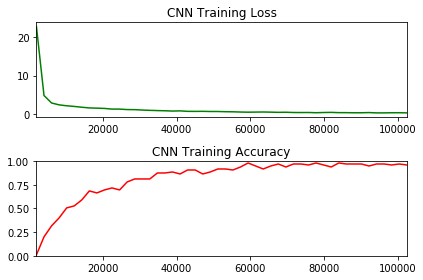

In [11]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('CNN Training Loss')
train_loss_plot.plot(cnn_train_batches, cnn_train_loss_batch, 'g')
train_loss_plot.set_xlim([cnn_train_batches[0], cnn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('CNN Training Accuracy')
train_acc_plot.plot(cnn_train_batches, cnn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([cnn_train_batches[0], cnn_train_batches[-1]])

plt.tight_layout()
plt.show()

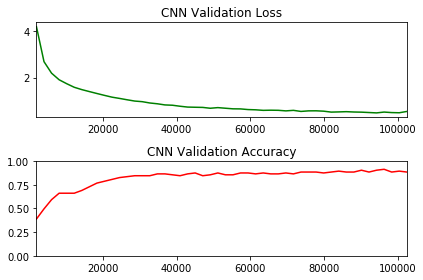

In [12]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('CNN Validation Loss')
valid_loss_plot.plot(cnn_valid_batches, cnn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([cnn_valid_batches[0], cnn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('CNN Validation Accuracy')
valid_acc_plot.plot(cnn_valid_batches, cnn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([cnn_valid_batches[0], cnn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [7]:
output5 = open("./train_data", 'wb')
pickle.dump(train_data, output5)
db5 = open("./train_data", 'rb')
train_data = pickle.load(db5)

output6 = open("./valid_data", 'wb')
pickle.dump(valid_data, output6)
db6 = open("./valid_data", 'rb')
valid_data = pickle.load(db6)

output7 = open("./train_target", 'wb')
pickle.dump(train_target, output7)
db7 = open("./train_target", 'rb')
train_target = pickle.load(db7)

output8 = open("./valid_target", 'wb')
pickle.dump(valid_target, output8)
db8 = open("./valid_target", 'rb')
valid_target = pickle.load(db8)

In [14]:
del cnn_train_loss_batch
del cnn_valid_loss_batch
del cnn_train_acc_batch 
del cnn_valid_acc_batch 
del cnn_train_batches 
del cnn_valid_batches 

In [7]:
from mask_attn_text_rnn import rnn_Model
epochs=40
rnn_train_loss_batch = []
rnn_valid_loss_batch = []
rnn_train_acc_batch = []
rnn_valid_acc_batch = []
rnn_train_batches = []
rnn_valid_batches = []
rnn_max_vacc=0.0
log_batch_step=2048
batch_size=64
f_va = 0.0
f_len = 0

In [8]:
with tf.Session() as sess:
    rann = rnn_Model(128, 20, 200, em_mx, 64, 1, max_len)
    tvars = tf.trainable_variables()
    grads, _ = tf.clip_by_global_norm(tf.gradients(rann.loss, tvars), 5.0)
    optimizer = tf.train.AdamOptimizer(0.001)
    train_op = optimizer.apply_gradients(zip(grads, tvars)) 
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            batch_seq = train_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}    
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {}
            _, l, a = sess.run([train_op, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.batch_size : input_x_count,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = rnn_train_batches[-1] if rnn_train_batches else 0
                rnn_train_batches.append(log_batch_step + previous_batch)
                rnn_train_loss_batch.append(l)
                rnn_train_acc_batch.append(a)
                    
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}     
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {}
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.batch_size : input_x_count,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = rnn_valid_batches[-1] if rnn_valid_batches else 0
                rnn_valid_batches.append(log_batch_step + previous_batch)
                rnn_valid_loss_batch.append(v_l)
                rnn_valid_acc_batch.append(va)
                
        fp = []
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy2(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
    
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, batch_start + k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
 
            pred, _ = sess.run([rann.predictions, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.batch_size : input_x_count,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            for i in range(pred.shape[0]):
                fp.append(pred[i])

        for j in range(len(valid_target)):
            cand = -1
            times = 0
            for i in range(len(fp)):
                if d[i] == j:
                    if times == 0:
                        cand = fp[i]
                        times = 1
                    elif cand == fp[i]:
                        times += 1
                    else:
                        times -= 1

            if cand == valid_target[j]:
                f_va += 1.0
            f_len += 1
            
        f_va = f_va / f_len  
        index = 0
        d = {}
        if f_va > rnn_max_vacc:
            rnn_max_vacc = f_va
            saver2.save(sess,'./rnn.ckpt', global_step=epoch_i)  
        f_va = 0.0
        f_len = 0
    print (rnn_max_vacc)

Epoch  1/40: 100%|██████████████████████| 221/221 [09:42<00:00,  2.64s/batches]

Epoch  2/40: 100%|██████████████████████| 221/221 [09:44<00:00,  2.64s/batches]

Epoch  3/40: 100%|██████████████████████| 221/221 [09:58<00:00,  2.71s/batches]

Epoch  4/40: 100%|██████████████████████| 221/221 [09:51<00:00,  2.68s/batches]

Epoch  5/40: 100%|██████████████████████| 221/221 [10:02<00:00,  2.73s/batches]

Epoch  6/40: 100%|██████████████████████| 221/221 [09:52<00:00,  2.68s/batches]

Epoch  7/40: 100%|██████████████████████| 221/221 [09:53<00:00,  2.69s/batches]

Epoch  8/40: 100%|██████████████████████| 221/221 [10:01<00:00,  2.72s/batches]

Epoch  9/40: 100%|██████████████████████| 221/221 [09:55<00:00,  2.69s/batches]

Epoch 10/40: 100%|██████████████████████| 221/221 [10:02<00:00,  2.73s/batches]

Epoch 11/40: 100%|██████████████████████| 221/221 [09:52<00:00,  2.68s/batches]

Epoch 12/40: 100%|██████████████████████| 221/221 [09:54<00:00,  2.69s/batches]

Epoch 13/40: 100%|██████████

0.894100169779287


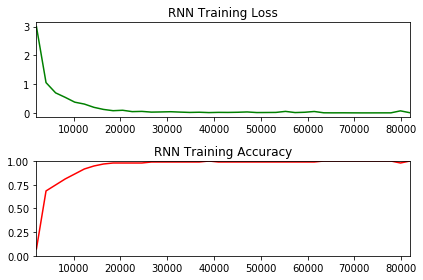

In [9]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('RNN Training Loss')
train_loss_plot.plot(rnn_train_batches, rnn_train_loss_batch, 'g')
train_loss_plot.set_xlim([rnn_train_batches[0], rnn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('RNN Training Accuracy')
train_acc_plot.plot(rnn_train_batches, rnn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([rnn_train_batches[0], rnn_train_batches[-1]])

plt.tight_layout()
plt.show()

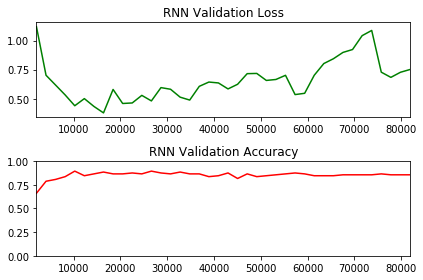

In [10]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('RNN Validation Loss')
valid_loss_plot.plot(rnn_valid_batches, rnn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([rnn_valid_batches[0], rnn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('RNN Validation Accuracy')
valid_acc_plot.plot(rnn_valid_batches, rnn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([rnn_valid_batches[0], rnn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [11]:
del rnn_train_loss_batch
del rnn_valid_loss_batch
del rnn_train_acc_batch
del rnn_valid_acc_batch
del rnn_train_batches
del rnn_valid_batches

In [8]:
def div_x(X_, le=40):
    m = ""
    ff=np.zeros((len(X_), le), dtype=np.int32)
    for j, s in enumerate(X_):
        h=le-len(s)
        for w in s:
            try:
                m += str(em_sen[w]) + " "
            except KeyError:
                m += "0" + " "
        if h!=0:
            for i in range(h):
                m += "0" + " "
        m = m.strip()
        g = m.split(" ")
        sub=[]
        for gg in g:
            sub.append(int(gg))
        ff[j] = sub
        m=""
    return ff

In [5]:
def get_X(X):
    sen =[]
    for i, t in enumerate(X):
        m = []
        for j, s in enumerate(t):
            m.append(s)
        sen.append(m)
    return sen

In [6]:
max_len2 = 0    
pre_train_x = []
X_train = get_X(train_data)
for t in X_train:
    sen1 = [y for x in t for y in x]
    pre_train_x.append(sen1)
    if max_len2 < len(sen1):
        max_len2 = len(sen1)
        
pre_test_x = []
X_test = get_X(valid_data)
for t in X_test:
    sen2 = [y for x in t for y in x]
    pre_test_x.append(sen2)
    if max_len2 < len(sen2):
        max_len2 = len(sen2)
        
print (max_len2)

10039


In [9]:
output9 = open("./pre_train_x", 'wb')
pickle.dump(pre_train_x, output9)
db9 = open("./pre_train_x", 'rb')
pre_train_x = pickle.load(db9)

output10 = open("./pre_test_x", 'wb')
pickle.dump(pre_test_x, output10)
db10 = open("./pre_test_x", 'rb')
pre_test_x = pickle.load(db10)

In [8]:
from mask_mult_text_attn import attn_Model
epochs=20
attn_train_loss_batch = []
attn_valid_loss_batch = []
attn_train_acc_batch = []
attn_valid_acc_batch = []
attn_train_batches = []
attn_valid_batches = []
attn_max_vacc=0.0
log_batch_step=2048
batch_size=32
f_va = 0.0
f_len = 0

In [9]:
with tf.Session() as sess:
    rann = attn_Model(20, 200, em_mx, max_len2)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(rann.loss)
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            x_batch_seq = pre_train_x[batch_start:batch_start + batch_size]
            y_batch_seq = train_target[batch_start:batch_start + batch_size]
            input_y = sess.run(rann.y, feed_dict = {rann.onehot : y_batch_seq})
            input_x = div_x(x_batch_seq, max_len2)
            _, l, a = sess.run([optimizer, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = attn_train_batches[-1] if attn_train_batches else 0
                attn_train_batches.append(log_batch_step + previous_batch)
                attn_train_loss_batch.append(l)
                attn_train_acc_batch.append(a)
                
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            x_batch_seq = pre_test_x[batch_start:batch_start + batch_size]
            y_batch_seq = valid_target[batch_start:batch_start + batch_size]
            input_y = sess.run(rann.y, feed_dict = {rann.onehot : y_batch_seq})
            input_x = div_x(x_batch_seq, max_len2)
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = attn_valid_batches[-1] if attn_valid_batches else 0
                attn_valid_batches.append(log_batch_step + previous_batch)
                attn_valid_loss_batch.append(v_l)
                attn_valid_acc_batch.append(va)
        
        for j in batches_pbar2:
            batch_start = j*batch_size
            x_batch_seq = pre_test_x[batch_start:batch_start + batch_size]
            y_batch_seq = valid_target[batch_start:batch_start + batch_size]
            f_len += len(y_batch_seq)
            input_y = sess.run(rann.y, feed_dict = {rann.onehot : y_batch_seq})
            input_x = div_x(x_batch_seq, max_len2)
            va2, v_l = sess.run([rann.accuracy2, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            f_va += va2
        
        f_va = f_va / f_len
        if f_va>attn_max_vacc:
            attn_max_vacc = f_va
            saver3.save(sess,'./attn.ckpt', global_step=epoch_i)  
        f_va = 0.0
        f_len = 0
    print (attn_max_vacc)

Epoch  1/20: 100%|████████████████████| 442/442 [1:52:10<00:00, 15.23s/batches]

Epoch  2/20: 100%|████████████████████| 442/442 [1:57:25<00:00, 15.94s/batches]

Epoch  3/20: 100%|████████████████████| 442/442 [1:57:10<00:00, 15.91s/batches]

Epoch  4/20: 100%|████████████████████| 442/442 [1:51:18<00:00, 15.11s/batches]

Epoch  5/20: 100%|████████████████████| 442/442 [1:50:07<00:00, 14.95s/batches]

Epoch  6/20: 100%|████████████████████| 442/442 [1:50:25<00:00, 14.99s/batches]

Epoch  7/20: 100%|████████████████████| 442/442 [1:50:26<00:00, 14.99s/batches]

Epoch  8/20: 100%|████████████████████| 442/442 [1:50:13<00:00, 14.96s/batches]

Epoch  9/20: 100%|████████████████████| 442/442 [1:50:14<00:00, 14.97s/batches]

Epoch 10/20: 100%|████████████████████| 442/442 [1:50:38<00:00, 15.02s/batches]

Epoch 11/20: 100%|████████████████████| 442/442 [1:50:08<00:00, 14.95s/batches]

Epoch 12/20: 100%|████████████████████| 442/442 [1:50:16<00:00, 14.97s/batches]

Epoch 13/20: 100%|██████████

0.890067911715


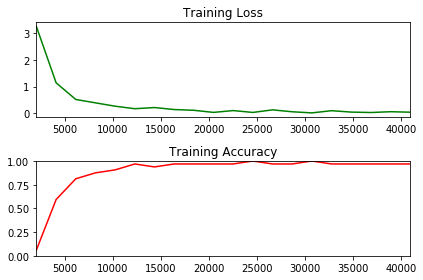

In [10]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('Training Loss')
train_loss_plot.plot(attn_train_batches, attn_train_loss_batch, 'g')
train_loss_plot.set_xlim([attn_train_batches[0], attn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('Training Accuracy')
train_acc_plot.plot(attn_train_batches, attn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([attn_train_batches[0], attn_train_batches[-1]])

plt.tight_layout()
plt.show()

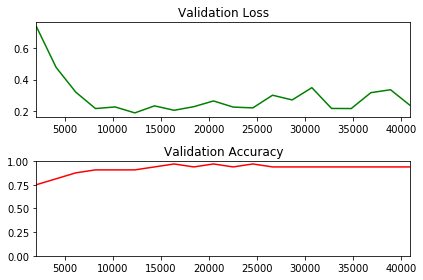

In [11]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('Validation Loss')
valid_loss_plot.plot(attn_valid_batches, attn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([attn_valid_batches[0], attn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('Validation Accuracy')
valid_acc_plot.plot(attn_valid_batches, attn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([attn_valid_batches[0], attn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [12]:
del attn_train_loss_batch
del attn_valid_loss_batch
del attn_train_acc_batch
del attn_valid_acc_batch
del attn_train_batches
del attn_valid_batches

In [10]:
batch_size1=64

g1 = tf.Graph()
g2 = tf.Graph()
g3 = tf.Graph()
sess1 = tf.Session(graph=g1)
sess2 = tf.Session(graph=g2)
sess3 = tf.Session(graph=g3)

cnn_preds = None
rnn_preds = None
attn_preds = None
z_in1 = None
z_in2 = None
z_in3 = None
cnn_input_x = None
cnn_dropout = None
rnn_input_x = None
rnn_dropout = None
attn_input_x = None
attn_dropout = None
batch_size = None

with sess1.as_default(): 
    with g1.as_default():
        saver1 = tf.train.import_meta_graph('cnn/cnn.ckpt-39.meta')
        model_file1 = tf.train.latest_checkpoint('cnn/')
        saver1.restore(sess1, model_file1)
        scores = g1.get_tensor_by_name("cnn_output/scores:0")
        cnn_preds = g1.get_tensor_by_name("cnn_output/predictions:0")
        cnn_input_x = g1.get_tensor_by_name("cnn_encoder_inputs:0")
        cnn_dropout = g1.get_tensor_by_name("cnn_dropout_keep_prob:0")
        z_in1 = g1.get_tensor_by_name("z_in1:0")
        z_in2 = g1.get_tensor_by_name("z_in2:0")
        z_in3 = g1.get_tensor_by_name("z_in3:0")
        
with sess2.as_default(): 
    with g2.as_default():
        saver2 = tf.train.import_meta_graph('rnn/rnn.ckpt-39.meta')
        model_file2 = tf.train.latest_checkpoint('rnn/')
        saver2.restore(sess2, model_file2)
        rnn_probs = g2.get_tensor_by_name("rnn_prob:0")
        rnn_preds = g2.get_tensor_by_name("rnn_predictions:0")
        rnn_input_x = g2.get_tensor_by_name("rnn_encoder_inputs:0")
        rnn_dropout = g2.get_tensor_by_name("rnn_dropout_keep_prob:0")
        batch_size = g2.get_tensor_by_name("batch_size:0")
        
        
with sess3.as_default(): 
    with g3.as_default():
        saver3 = tf.train.import_meta_graph('attn/attn.ckpt-18.meta')
        model_file3 = tf.train.latest_checkpoint('attn/')
        saver3.restore(sess3, model_file3)
        attn_preds = g3.get_tensor_by_name("attn_predictions:0")
        attn_input_x = g3.get_tensor_by_name("attn_encoder_inputs:0")
        attn_dropout = g3.get_tensor_by_name("attn_dropout_keep_prob:0")

batch_count = int(math.ceil(len(valid_target)/batch_size1))
batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(1, 1), unit='batches')
fp = []
fp2 = []
for j in batches_pbar:
    batch_start = j*batch_size1
    batch_seq = valid_data[batch_start:batch_start + batch_size1]
    input_x_count = 0
    for k in range(len(batch_seq)):
        input_x, _ = div_xy2(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
        input_x_count += input_x.shape[0]

    input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
    temp = 0
    for k in range(len(batch_seq)):
        input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, batch_start + k)
        for kk in range(input_x.shape[0]):
            input_x_list[temp+kk] = input_x[kk]
        temp += input_x.shape[0]

    input_z1 = div_z(input_x_list, max_len-1, 50)
    input_z2 = div_z(input_x_list, max_len-2, 50)
    input_z3 = div_z(input_x_list, max_len-3, 50)
    pred = sess1.run(cnn_preds, feed_dict = {
                        cnn_input_x: input_x_list,
                        z_in1 : input_z1,
                        z_in2 : input_z2,
                        z_in3 : input_z3,
                        cnn_dropout : 1.0
                        })
    for i in range(pred.shape[0]):
        fp.append(pred[i])

    pred2 = sess2.run(rnn_preds, feed_dict={
            rnn_input_x : input_x_list,
            batch_size : input_x_count,
            rnn_dropout : 1.0
        })
    for i in range(pred2.shape[0]):
        fp2.append(pred2[i])

f_list = []
for j in range(len(valid_target)):
    cand = -1
    times = 0
    for i in range(len(fp)):
        if d[i] == j:
            if times == 0:
                cand = fp[i]
                times = 1
            elif cand == fp[i]:
                times += 1
            else:
                times -= 1
    f_list.append(cand)

f_list2 = []
for j in range(len(valid_target)):
    cand = -1
    times = 0
    for i in range(len(fp2)):
        if d[i] == j:
            if times == 0:
                cand = fp2[i]
                times = 1
            elif cand == fp2[i]:
                times += 1
            else:
                times -= 1
    f_list2.append(cand)

del fp, fp2   
d = {}
del input_x_list
del input_z1
del input_z2
del input_z3

f_list3 = []
for j in batches_pbar:
    batch_start = j*batch_size1
    x_batch_seq = pre_test_x[batch_start:batch_start + batch_size1]
    input_x = div_x(x_batch_seq, max_len2)
    ps = sess3.run(attn_preds, feed_dict = {
                          attn_input_x : input_x,
                          attn_dropout : 1.0
                        })
    for i in range(ps.shape[0]):
        f_list3.append(ps[i])

index = 0
batch_count = int(math.ceil(len(train_target)/batch_size1))
batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(1, 1), unit='batches')
t_list = []
t_list2 = []
for j in batches_pbar:
    batch_start = j*batch_size1
    batch_seq = train_data[batch_start:batch_start + batch_size1]
    input_x_count = 0
    for k in range(len(batch_seq)):
        input_x, _ = div_xy2(train_data[batch_start + k], train_target[batch_start + k], max_len)
        input_x_count += input_x.shape[0]
       
    input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
    temp = 0
    for k in range(len(batch_seq)):
        input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, batch_start + k)
        for kk in range(input_x.shape[0]):
            input_x_list[temp+kk] = input_x[kk]
        temp += input_x.shape[0]

    input_z1 = div_z(input_x_list, max_len-1, 50)
    input_z2 = div_z(input_x_list, max_len-2, 50)
    input_z3 = div_z(input_x_list, max_len-3, 50)

    tp1 = sess1.run(cnn_preds, feed_dict={
            cnn_input_x: input_x_list,
            z_in1 : input_z1,
            z_in2 : input_z2,
            z_in3 : input_z3,
            cnn_dropout : 1.0
        })
    for i in range(tp1.shape[0]):
        t_list.append(tp1[i])

    tp2 = sess2.run(rnn_preds, feed_dict={
            rnn_input_x : input_x_list,
            batch_size : input_x_count,
            rnn_dropout : 1.0
        })
    for i in range(tp1.shape[0]):
        t_list2.append(tp2[i])

tf_list = []
for j in range(len(train_target)):
    cand = -1
    times = 0
    for i in range(len(t_list)):
        if d[i] == j:
            if times == 0:
                cand = t_list[i]
                times = 1
            elif cand == t_list[i]:
                times += 1
            else:
                times -= 1
    tf_list.append(cand)
    
tf_list2 = []
for j in range(len(train_target)):
    cand = -1
    times = 0
    for i in range(len(t_list2)):
        if d[i] == j:
            if times == 0:
                cand = t_list2[i]
                times = 1
            elif cand == t_list2[i]:
                times += 1
            else:
                times -= 1
    tf_list2.append(cand)

d = {}
tf_list3 = []
for j in batches_pbar:
    batch_start = j*batch_size1
    x_batch_seq = pre_train_x[batch_start:batch_start + batch_size1]
    input_x = div_x(x_batch_seq, max_len2)
    ps = sess3.run(attn_preds, feed_dict = {
                          attn_input_x : input_x,
                          attn_dropout : 1.0
                        })
    for i in range(ps.shape[0]):
        tf_list3.append(ps[i])

onehot = tf.placeholder(tf.int32, [None], name="onehot_in")
y = tf.one_hot(onehot,20,1,0,name="one_hot")
y_out = tf.placeholder(tf.float32, [None, 20], name="y_out")
x_in = tf.placeholder(tf.float32, [None, None], name="x_in")

x_in2 = tf.reshape(x_in, (-1, 3, 20))
keys = tf.Variable(tf.truncated_normal([20, 1], stddev=0.1), name='keys')
tt = tf.matmul(x_in, keys)
tt = tf.reshape(tt, (-1, 3))
f_scores = tf.nn.softmax(tt)
con = tf.expand_dims(f_scores, -1) * x_in2
final_y = tf.reduce_sum(con, 1)
final_preds = tf.argmax(final_y, 1)
loss = tf.losses.softmax_cross_entropy(y_out, final_y)
opt = tf.train.AdamOptimizer(0.001).minimize(loss)
f_va = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_out, 1), final_preds), tf.float32))

g = tf.get_default_graph()
sess = tf.Session(graph=g)
with sess.as_default(): 
    with g.as_default():
        sess.run(tf.global_variables_initializer())
        tf_y1 = sess.run(y, feed_dict = {onehot : tf_list})
        tf_y2 = sess.run(y, feed_dict = {onehot : tf_list2})
        tf_y3 = sess.run(y, feed_dict = {onehot : tf_list3})
        tf_y = sess.run(y, feed_dict = {onehot : train_target})

        tf_x = np.zeros((len(tf_list3)*3, 20), dtype=np.float32)
        j = 0
        for i in range(tf_y.shape[0]):
            tf_x[j] = tf_y1[i]
            j += 1
            tf_x[j] = tf_y2[i]
            j += 1
            tf_x[j] = tf_y3[i]
            j += 1

        j = 0
        while j<10:
            _, l, a = sess.run([opt, loss, f_va], feed_dict = {
                                      x_in : tf_x,
                                      y_out : tf_y
                                    })
            j+=1

        f_y1 = sess.run(y, feed_dict = {onehot : f_list})
        f_y2 = sess.run(y, feed_dict = {onehot : f_list2})
        f_y3 = sess.run(y, feed_dict = {onehot : f_list3})
        f_y = sess.run(y, feed_dict = {onehot : valid_target})

        f_x = np.zeros((len(f_list3)*3, 20), dtype=np.float32)
        j = 0
        for i in range(f_y.shape[0]):
            f_x[j] = f_y1[i]
            j += 1
            f_x[j] = f_y2[i]
            j += 1
            f_x[j] = f_y3[i]
            j += 1

        fps, fa = sess.run([final_preds, f_va], feed_dict = {
                                      x_in : f_x,
                                      y_out : f_y
                                    })
        print (fa)

sess.close()
sess1.close()
sess2.close()
sess3.close()


Epoch  1/1: 100%|███████████████████████| 221/221 [07:56<00:00,  1.99s/batches]


0.9170204


In [11]:
def major(lt):
    cand=-1
    times=0
    for i in range(len(lt)):
        if times==0:
            cand = lt[i]
            times = 1
        elif lt[i]==cand:
            times+=1
        else:
            times-=1
    return cand

In [11]:
vacc = 0.0
f_va = 0.0

g1 = tf.Graph()
g2 = tf.Graph()
g3 = tf.Graph()

sess1 = tf.Session(graph=g1)
sess2 = tf.Session(graph=g2)
sess3 = tf.Session(graph=g3)

cnn_preds = None
rnn_preds = None
attn_preds = None
z_in1 = None
z_in2 = None
z_in3 = None
cnn_input_x = None
cnn_dropout = None
rnn_input_x = None
rnn_dropout = None
attn_input_x = None
attn_dropout = None
batch_size = None

with sess1.as_default(): 
    with g1.as_default():
        saver1 = tf.train.import_meta_graph('cnn/cnn.ckpt-39.meta')
        model_file1 = tf.train.latest_checkpoint('cnn/')
        saver1.restore(sess1, model_file1)
        cnn_preds = g1.get_tensor_by_name("cnn_output/predictions:0")
        cnn_input_x = g1.get_tensor_by_name("cnn_encoder_inputs:0")
        cnn_dropout = g1.get_tensor_by_name("cnn_dropout_keep_prob:0")
        z_in1 = g1.get_tensor_by_name("z_in1:0")
        z_in2 = g1.get_tensor_by_name("z_in2:0")
        z_in3 = g1.get_tensor_by_name("z_in3:0")
        
with sess2.as_default(): 
    with g2.as_default():
        saver2 = tf.train.import_meta_graph('rnn/rnn.ckpt-39.meta')
        model_file2 = tf.train.latest_checkpoint('rnn/')
        saver2.restore(sess2, model_file2)
        rnn_preds = g2.get_tensor_by_name("rnn_predictions:0")
        rnn_input_x = g2.get_tensor_by_name("rnn_encoder_inputs:0")
        rnn_dropout = g2.get_tensor_by_name("rnn_dropout_keep_prob:0")
        batch_size = g2.get_tensor_by_name("batch_size:0")
        
        
with sess3.as_default(): 
    with g3.as_default():
        saver3 = tf.train.import_meta_graph('attn/attn.ckpt-18.meta')
        model_file3 = tf.train.latest_checkpoint('attn/')
        saver3.restore(sess3, model_file3)
        attn_preds = g3.get_tensor_by_name("attn_predictions:0")
        attn_input_x = g3.get_tensor_by_name("attn_encoder_inputs:0")
        attn_dropout = g3.get_tensor_by_name("attn_dropout_keep_prob:0")

batch_count = int(math.ceil(len(valid_target)/batch_size1))
batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(1, 1), unit='batches')
fp = []
fp2 = []
for j in batches_pbar:
    batch_start = j*batch_size1
    batch_seq = valid_data[batch_start:batch_start + batch_size1]
    input_x_count = 0
    for k in range(len(batch_seq)):
        input_x, _ = div_xy2(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
        input_x_count += input_x.shape[0]

    input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
    temp = 0
    for k in range(len(batch_seq)):
        input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, batch_start + k)
        for kk in range(input_x.shape[0]):
            input_x_list[temp+kk] = input_x[kk]
        temp += input_x.shape[0]

    input_z1 = div_z(input_x_list, max_len-1, 50)
    input_z2 = div_z(input_x_list, max_len-2, 50)
    input_z3 = div_z(input_x_list, max_len-3, 50)
    pred = sess1.run(cnn_preds, feed_dict = {
                        cnn_input_x: input_x_list,
                        z_in1 : input_z1,
                        z_in2 : input_z2,
                        z_in3 : input_z3,
                        cnn_dropout : 1.0
                        })
    for i in range(pred.shape[0]):
        fp.append(pred[i])

    pred2 = sess2.run(rnn_preds, feed_dict={
            rnn_input_x : input_x_list,
            batch_size : input_x_count,
            rnn_dropout : 1.0
        })
    for i in range(pred2.shape[0]):
        fp2.append(pred2[i])

f_list = []
for j in range(len(valid_target)):
    cand = -1
    times = 0
    for i in range(len(fp)):
        if d[i] == j:
            if times == 0:
                cand = fp[i]
                times = 1
            elif cand == fp[i]:
                times += 1
            else:
                times -= 1
    f_list.append(cand)

f_list2 = []
for j in range(len(valid_target)):
    cand = -1
    times = 0
    for i in range(len(fp2)):
        if d[i] == j:
            if times == 0:
                cand = fp2[i]
                times = 1
            elif cand == fp2[i]:
                times += 1
            else:
                times -= 1
    f_list2.append(cand)

del fp, fp2   
d = {}
del input_x_list
del input_z1
del input_z2
del input_z3

f_list3 = []
for j in batches_pbar:
    batch_start = j*batch_size1
    x_batch_seq = pre_test_x[batch_start:batch_start + batch_size1]
    input_x = div_x(x_batch_seq, max_len2)
    ps = sess3.run(attn_preds, feed_dict = {
                          attn_input_x : input_x,
                          attn_dropout : 1.0
                        })
    for i in range(ps.shape[0]):
        f_list3.append(ps[i])

ff = []
for i in range(0,len(valid_target)):
    ff2 = []
    ff2.append(f_list[i])
    ff2.append(f_list2[i])
    ff2.append(f_list3[i])
    ff.append(major(ff2))

for i in range(0,len(valid_target)):
    if ff[i] == valid_target[i]:
        f_va += 1.0
vacc = f_va / len(ff)
print (vacc)

sess1.close()
sess2.close()
sess3.close()

Epoch  1/1: 100%|█████████████████████████| 74/74 [02:27<00:00,  1.67s/batches]


0.91553480475382


In [3]:
sen =[]
for i, t in enumerate(X):
    m = []
    for j, s in enumerate(t):
        m.append(s)
    sen.append((m, Y[i]))

In [4]:
from sklearn.model_selection import train_test_split
x, y = zip(*sen)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [5]:
for i in range(len(y_train)):
    label = '__label__' + str(y_train[i])
    X_train[i].append([label])

In [6]:
with open('train_ft.txt', 'w') as f:
    for t in X_train:
        sen = [y for x in t for y in x]
        www = " ".join(sen)
        f.write(www+'\n')

In [7]:
xx = []
for t in X_test:
    sen = [y for x in t for y in x]
    www = " ".join(sen)
    xx.append(www)

In [8]:
import fasttext
from sklearn import metrics
import numpy as np
clf = fasttext.supervised('train_ft.txt', 'model', dim=200, ws=5, neg=5, epoch=100, min_count=10, lr=0.1, lr_update_rate=1000, bucket=200000)
labels = clf.predict(xx)
y_preds = np.array(labels).flatten().astype(int)
m_precision = metrics.precision_score(y_test, y_preds, average='micro')
print (m_precision)

0.883913412564
